### Outliers Analysis

In [ ]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr

In [ ]:
#create a pandas dataframes from csv files
tweets = pd.read_csv('new_tweets.csv')

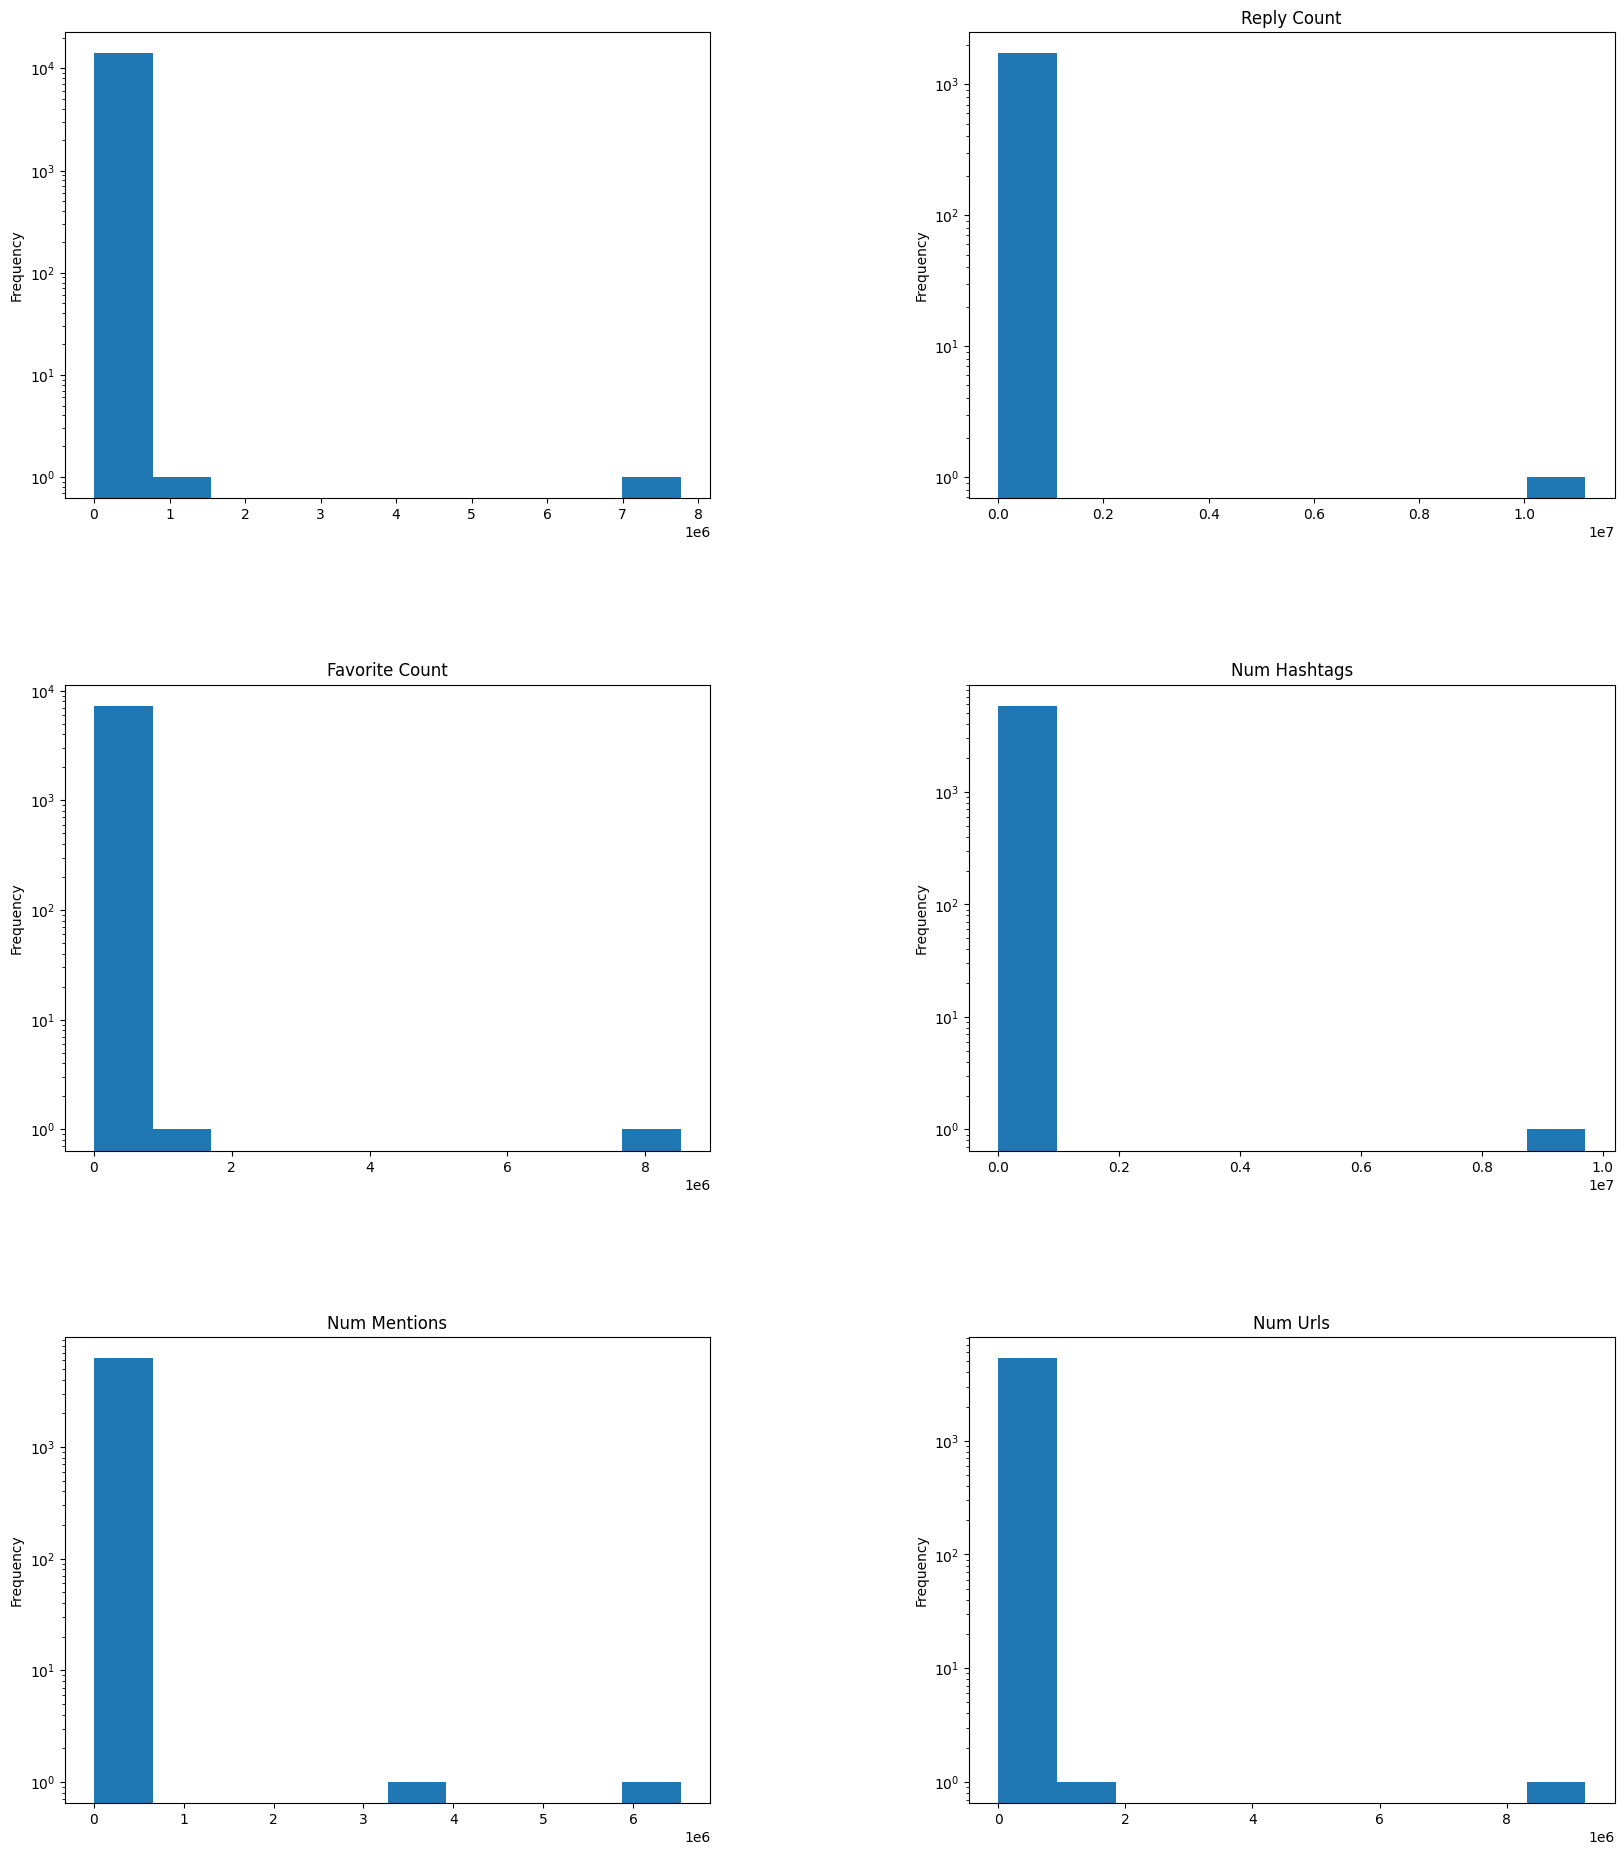

In [ ]:
fig = plt.figure(figsize=(20,23))
fig_dims = (3,2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

###fig 1
plt.subplot2grid(fig_dims, (0,0))
quantile_favorite = tweets[tweets['retweet_count'] < tweets['retweet_count'].quantile(.99)]
#quantile_favorite.value_counts().plot('retweet_count').hist('retweet_count', bins=round(math.log2(quantile_favorite.size)+ 1))
quantile_favorite['retweet_count'].value_counts().plot(kind='hist')
#quantile_favorite['retweet_count'].value_counts().plot(title='Retweet Count', kind='hist')
plt.yscale('log')
#tweets['retweet_count'].value_counts().plot(kind='hist', title='Retweet Count')
#plt.yscale('log')

###fig 2
plt.subplot2grid(fig_dims, (0,1))
tweets['reply_count'].value_counts().plot(kind='hist', title='Reply Count')
plt.yscale('log')

###fig 3
plt.subplot2grid(fig_dims, (1,0))
tweets['favorite_count'].value_counts().plot(kind='hist', title='Favorite Count')
plt.yscale('log')

###fig 4
plt.subplot2grid(fig_dims, (1,1))
tweets['num_hashtags'].value_counts().plot(kind='hist', title='Num Hashtags')
plt.yscale('log')

###fig 5
plt.subplot2grid(fig_dims, (2,0))
tweets['num_mentions'].value_counts().plot(kind='hist', title='Num Mentions')
plt.yscale('log')

###fig 6
plt.subplot2grid(fig_dims, (2,1))
tweets['num_urls'].value_counts().plot(kind='hist', title='Num Urls')
plt.yscale('log')


plt.show()

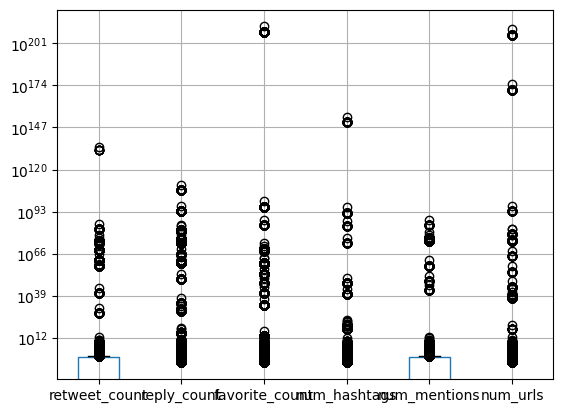

In [ ]:
tweets.boxplot(column=['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_mentions', 'num_urls'])
plt.yscale('log')


In [ ]:
clean_data = tweets.to_csv('clean_tweets_mean.csv')



In [ ]:
tweets_mean = pd.read_csv('clean_tweets_mean.csv', lineterminator='\n', index_col=0)
tweets_median = pd.read_csv('clean_tweets.csv', lineterminator='\n', index_col=0)
tweets_mean = tweets_mean.round()
tweets_mean['favorite_count'] = tweets_mean['favorite_count'].abs()

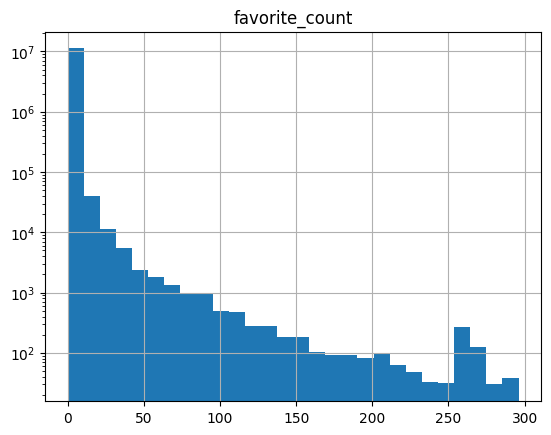

0.0

In [ ]:

#tweets.loc[tweets['favorite_count'] < tweets['favorite_count'].quantile(.75), 'favorite_count'] = math.nan
quantile_favorite = tweets_mean[tweets_mean['favorite_count'] < tweets_mean['favorite_count'].quantile(.999)]
quantile_favorite.hist('favorite_count', bins=round(math.log2(quantile_favorite.size)+ 1))
plt.yscale('log')
plt.show()
quantile_favorite['favorite_count'].min()

In [ ]:
#quantile_favorite = tweets[tweets['retweet_count'] < tweets['retweet_count'].quantile(.95)]
quantile_favorite = tweets_mean['retweet_count']
quantile_favorite.value_counts().describe()
plt.show()

In [ ]:
quantile_favorite = tweets_median['retweet_count']
quantile_favorite.value_counts().describe()


count    4.583800e+04
mean     2.460522e+02
std      3.861918e+04
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      8.196076e+06
Name: retweet_count, dtype: float64

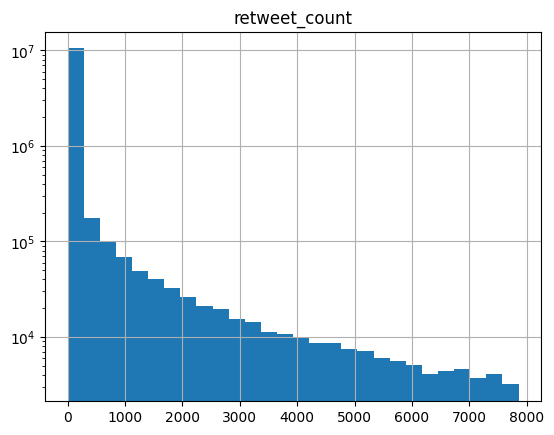

In [ ]:
quantile_favorite = tweets_mean[tweets_mean['retweet_count'] < tweets_mean['retweet_count'].quantile(.99)]
quantile_favorite.hist('retweet_count',bins=round(math.log2(quantile_favorite.size)+ 1))
plt.yscale('log')

plt.show()

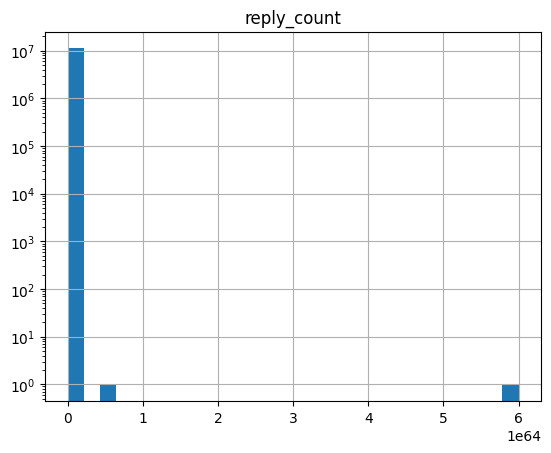

In [ ]:
#tweets.loc[tweets['favorite_count'] < tweets['favorite_count'].quantile(.75), 'favorite_count'] = math.nan
#quantile_favorite = tweets_mean[tweets_mean['reply_count'] < tweets_mean['reply_count'].quantile(.99)]
#quantile_favorite.hist('reply_count')
quantile_favorite = tweets_mean[tweets_mean['reply_count'] < tweets_mean['reply_count'].quantile(.9999)]
quantile_favorite.hist('reply_count', bins=round(math.log2(quantile_favorite.size)+ 1))
plt.yscale('log')

quantile_favorite.value_counts().describe()
plt.show()